In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder

# **Leer txt en csv para y revisar que información contiene**

In [2]:
archivo_txt = pd.read_csv("./data_txt_clean.txt", sep= ";")
archivo_txt.head(2)

,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
0,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN


# **Leer csv para revisar su contenido**

In [3]:
archivo_csv = pd.read_csv("./exported_db_data.csv")
archivo_csv.head(2)

,index,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
0,0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Leer xml para revisar su contenido**

In [4]:
archivo_xml = pd.read_csv("./data_xml_clean.xml")
archivo_xml.head()

,<data>
0,<row>
1,<level_0>0</level_0>
2,<index>0</index>
3,<time>910</time>
4,<age>50-54</age>


<font color=green>**Extraer información de xml para mejor adaptación a Csv, creando esta función para los valores de edad, time, gender e index**</font>

In [5]:

tree = ET.parse("data_xml_clean.xml")
root = tree.getroot()

edad = []
time = []
gender = []
index = []

for child in root:
    for subchild in child:
        if subchild.tag == "age":
            edad.append(subchild.text)
        elif subchild.tag == "time":
            time.append(subchild.text)
        elif subchild.tag == "gender":
            gender.append(subchild.text)
        elif subchild.tag == "index":
            index.append(subchild.text)



<font color=green>**Crear un DF haciendo ZIP a nuestras listas.**</font>

In [6]:
df_xml = pd.DataFrame(list(zip(index,edad,time,gender)), columns = ["index","edad","time", "gender"])
df_xml

,index,edad,time,gender
0,0,50-54,910,Man
1,1,50-54,784,Man
2,2,22-24,924,Man
3,3,45-49,575,Man
4,4,45-49,781,Man
...,...,...,...,...
25968,25968,30-34,1756,Man
25969,25969,22-24,253,Man
25970,25970,50-54,494,Man
25971,25971,45-49,277,Man


# **Leer nuevo archivo subido (kaggle) csv**

In [7]:
archivo_kaggle = pd.read_csv("data_remaning_kaggle.csv")
archivo_kaggle.head(2)

,Unnamed: 0,index,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [8]:
#Queremos ver cuantas columnas hay en este archivo
archivo_kaggle.columns

Index(['Unnamed: 0', 'index', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3',
       'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER', 'Q19_Part_1',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=214)

# Unión archivos


<font color=green>**Unir los 4 archivos ( txt, csv, xml, kaggle.csv) en un CSV único.**</font>

In [9]:
concat_archivos = pd.concat([df_xml, archivo_txt, archivo_csv, archivo_kaggle], axis=1)
concat_archivos

,index,edad,time,gender,index,Q3,Q4,Q5,Q6,Q8,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,50-54,910,Man,0,India,Bachelor’s degree,Other,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50-54,784,Man,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,2,22-24,924,Man,2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45-49,575,Man,3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,4,45-49,781,Man,4,India,Doctoral degree,Other,< 1 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,30-34,1756,Man,25968,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,25969,22-24,253,Man,25969,China,Master’s degree,Student,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,25970,50-54,494,Man,25970,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25971,25971,45-49,277,Man,25971,United States of America,Master’s degree,Data Scientist,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Comprobamos que suma de las columnas coinciden con las columnas totales después de haber hecho la unión.

print(archivo_txt.shape)
print(df_xml.shape)
print(archivo_csv.shape)
print(archivo_kaggle.shape)

(25973, 27)
(25973, 4)
(25973, 18)
(25973, 214)


In [11]:
#Eliminamos la columna "index" , cada archivo contiene una y hemos decidido eliminarlos primero.
del concat_archivos["index"]
print(concat_archivos.columns)

Index(['edad', 'time', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=259)


# **Una vez unidos en un solo DF vamos a guardar este nuevo CSV con enombre union_3_archivos**

In [12]:
concat_archivos.to_csv("union_3_archivos.csv")

# **Hacemos una copia en este momento donde comenzamos a trabajar con la unión** 💩

In [13]:
df = concat_archivos.copy()

# **Visualizamos qué información tenemos en nuestro archivo ya unido para dedicir qué columnas nos interesan**

In [14]:
pd.options.display.max_columns = None
df.head(3)

,edad,time,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Unnamed: 0,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,910,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
#Calculamos el % de datos nulos de cada columnas para hacernos una idea de la información que contiene

# otro metodo: df.stb.missing([df.columns])

nulos = (df.isnull().sum()/ len(df)*100).sort_values(ascending=False) #ordenamos de forma ascendente para comprobar si existen 100% nulos en algunas columnas.
porcentaje_isnull = np.round(nulos, decimals = 2) #redondeamos a 2 decimales
porcentaje_isnull


Q30_B_Part_3    100.0
Q30_B_Part_2    100.0
Q30_B_Part_1    100.0
Q30_B_Part_5    100.0
Q30_B_Part_6    100.0
                ...  
Unnamed: 0        0.0
Q5                0.0
Q6                0.0
time              0.0
edad              0.0
Length: 259, dtype: float64

# **Decidimos las columnas con las que finalmente vamos a trabajar**

In [16]:


columnas_preferidas= ["edad", "time", "gender", "Q3","Q4","Q5","Q6", "Q7", "Q9","Q10_Part_1",
                      "Q10_Part_2","Q11","Q14","Q15","Q16","Q20", "Q21", "Q22", "Q25", "Q27",'Q32', 
                      "Q34", 'Q39_Part_4', 'Q39_Part_6','Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 
                      'Q40_Part_4','Q40_Part_5','Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8','Q40_Part_9', 
                      'Q40_Part_10', 'Q40_Part_11','Q40_OTHER', 'Q41', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 
                      'Q42_Part_4','Q42_Part_5', 'Q42_Part_6','Q42_Part_7','Q42_Part_8', 'Q42_Part_9', 'Q42_Part_10', 
                      'Q42_Part_11', 'Q42_OTHER']


for col in df.columns:
    if col not in columnas_preferidas:
        del df[col]
    else:
        pass

In [17]:
for col in df.columns:
    if col not in columnas_preferidas:
        del df[col]
    else:
        pass

In [18]:
#Comprobamos que se ha ejecutado correctamente, el numero de columnas se ha reducido hasta 48, que son con las que vamos a trabajar.
df.columns.shape

(48,)

In [19]:
df.shape

(25973, 48)

# **Hacemos nueva copia del Data frame tras eliminación de las columnas**

In [20]:
df_new= df.copy()

# **Renombrar las columnas**

In [21]:
df_new.head(4)

,edad,time,gender,Q3,Q4,Q5,Q6,Q11,Q15,Q20,Q21,Q22,Q25,Q41,Q7,Q9,Q14,Q16,Q32,Q34,Q10_Part_1,Q10_Part_2,Q39_Part_4,Q39_Part_6,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER
0,50-54,910,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,784,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,22-24,924,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,"MySQL , MongoDB",None,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
3,45-49,575,Man,Mexico,Doctoral degree,Research Scientist,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [22]:
df_new.rename(columns= {"edad":"edad","gender":"genero","Q3":"pais","Q4":"educacion","Q5":"perfil_profesional",
                                    "Q6":"experiencia_programando", "Q7":"Lenguajes_habituales", "Q9":"Entorno_desarrollo",
                                    "Q10_Part_1":"notebooks_Kaggle", "Q10_Part_2":"notebooks_colab","Q11":"herramientas_trabajo", 
                                    "Q14":"Bibliotecas_visualización", "Q15":"año_uso_machine_learning", 
                                    "Q16":"herramientas_machine_learning", "Q20":"Industria_actual","Q21":"Tamaño_compañía", "Q22":"Trabajadores_DataScience", 
                                    "Q25":"Salario", "Q32":"Programas_Big_Data","Q34":"Herramientas_BI",'Q39_Part_4':"publicaciones_github", 'Q39_Part_6':"publicaciones_kaggle","Q40_Part_1":"Plat_Coursera","Q40_Part_2":"Plat_EdX",
                                    "Q40_Part_3":"Plat_Kaggle","Q40_Part_4":"Plat_Datacamp","Q40_Part_5":"Plat_Fast.AI","Q40_Part_6":"Plat_Udacity","Q40_Part_7":"Plat_Udemy",
                                    "Q40_Part_8":"Plat_Linkedinlearning","Q40_Part_9":"Plat_CloudCertification","Q40_Part_10":"Plat_UniversityCourses","Q40_Part_11":"Plat_Ninguno",
                                    "Q40_OTHER":"Plat_Otros",'Q41':'Herramienta_analisis_datos',
                                    'Q42_Part_1':'RRSS_twitter', 'Q42_Part_2':'RRSS_email/newsletters', 'Q42_Part_3':'RRSS_reddit', 'Q42_Part_4':'RRSS_kaggle',
                                    'Q42_Part_5':'RRSS_forums', 'Q42_Part_6':'RRSS_yotube', 'Q42_Part_7':'RRSS_podcast', 'Q42_Part_8':'RRSS_blogs', 'Q42_Part_9':'RRSS_journal',
                                    'Q42_Part_10':'RRSS_slackcommunity', 'Q42_Part_11':'RRSS_none', 'Q42_OTHER':'RRSS_others'},inplace=True)

In [23]:
df_new.columns

Index(['edad', 'time', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'Industria_actual', 'Tamaño_compañía',
       'Trabajadores_DataScience', 'Salario', 'Herramienta_analisis_datos',
       'Lenguajes_habituales', 'Entorno_desarrollo',
       'Bibliotecas_visualización', 'herramientas_machine_learning',
       'Programas_Big_Data', 'Herramientas_BI', 'notebooks_Kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'Plat_Coursera', 'Plat_EdX', 'Plat_Kaggle', 'Plat_Datacamp',
       'Plat_Fast.AI', 'Plat_Udacity', 'Plat_Udemy', 'Plat_Linkedinlearning',
       'Plat_CloudCertification', 'Plat_UniversityCourses', 'Plat_Ninguno',
       'Plat_Otros', 'RRSS_twitter', 'RRSS_email/newsletters', 'RRSS_reddit',
       'RRSS_kaggle', 'RRSS_forums', 'RRSS_yotube', 'RRSS_podcast',
       'RRSS_blogs', 'RRSS_journal', 'RRSS_slackcommunity', 'RRSS_none',
       'RRS

# **Reordenar las columnas**

In [25]:
# nuevo_orden =['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
#        'experiencia_programando', 'herramientas_trabajo',
#        'año_uso_machine_learning', 'Industria_actual', 'Tamaño_compañía',
#        'Trabajadores_DataScience', 'Salario', 'Herramienta_analisis_datos',
#        'Lenguajes_habituales', 'Entorno_desarrollo',
#        'Bibliotecas_visualización', 'herramientas_machine_learning',
#        'Programas_Big_Data', 'Herramientas_BI', 'notebooks_Kaggle',
#        'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
#        'Plat_Coursera', 'Plat_EdX', 'Plat_Kaggle', 'Plat_Datacamp',
#        'Plat_Fast.AI', 'Plat_Udacity', 'Plat_Udemy', 'Plat_Linkedinlearning',
#        'Plat_CloudCertification', 'Plat_UniversityCourses', 'Plat_Ninguno',
#        'Plat_Otros', 'RRSS_twitter', 'RRSS_email/newsletters', 'RRSS_reddit',
#        'RRSS_kaggle', 'RRSS_forums', 'RRSS_yotube', 'RRSS_podcast',
#        'RRSS_blogs', 'RRSS_journal', 'RRSS_slackcommunity', 'RRSS_none',
#        'RRSS_others']

# df_new.reindex(columns=nuevo_orden)

# Poner en minusculas todas las columnas del DF

In [24]:
nuevas_columnas = {col: col.lower() for col in df_new.columns}
df_new.rename(columns = nuevas_columnas, inplace = True)
nuevas_columnas

{'edad': 'edad',
 'time': 'time',
 'genero': 'genero',
 'pais': 'pais',
 'educacion': 'educacion',
 'perfil_profesional': 'perfil_profesional',
 'experiencia_programando': 'experiencia_programando',
 'herramientas_trabajo': 'herramientas_trabajo',
 'año_uso_machine_learning': 'año_uso_machine_learning',
 'Industria_actual': 'industria_actual',
 'Tamaño_compañía': 'tamaño_compañía',
 'Trabajadores_DataScience': 'trabajadores_datascience',
 'Salario': 'salario',
 'Herramienta_analisis_datos': 'herramienta_analisis_datos',
 'Lenguajes_habituales': 'lenguajes_habituales',
 'Entorno_desarrollo': 'entorno_desarrollo',
 'Bibliotecas_visualización': 'bibliotecas_visualización',
 'herramientas_machine_learning': 'herramientas_machine_learning',
 'Programas_Big_Data': 'programas_big_data',
 'Herramientas_BI': 'herramientas_bi',
 'notebooks_Kaggle': 'notebooks_kaggle',
 'notebooks_colab': 'notebooks_colab',
 'publicaciones_github': 'publicaciones_github',
 'publicaciones_kaggle': 'publicaciones_k

# Limpieza strings   

    DUPLICADOS

In [25]:
#Contamos cuantas filas duplicadas tenemos
df_new.duplicated().sum()

0

In [26]:
#Las eliminamos(he probado a recoger df.new.columns.to_list y guardar en variable pero .drop_duplicated no acepta listas)
df_new.drop_duplicates(subset = ['edad', 'genero', 'pais', 'educacion', 'perfil_profesional','experiencia_programando',
 'herramientas_trabajo','año_uso_machine_learning', 'industria_actual', 'tamaño_compañía','trabajadores_datascience', 
 'salario', 'herramienta_analisis_datos','lenguajes_habituales', 'entorno_desarrollo','bibliotecas_visualización', 
 'herramientas_machine_learning','programas_big_data', 'herramientas_bi', 'notebooks_kaggle','notebooks_colab', 
 'publicaciones_github', 'publicaciones_kaggle','plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
 'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning','plat_cloudcertification', 'plat_universitycourses', 
 'plat_ninguno','plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit','rrss_kaggle', 'rrss_forums', 'rrss_yotube', 
 'rrss_podcast','rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none','rrss_others'], inplace = True) 

# Division y Creacion nuevas columnas STRINGS

    ESTA PARTE ESTÁ EN ESTUDIO EN DOC PRUEBAS DE LA MAIN GITHUB

    DIVIDIENDO TEXTOS CON REGEX



# ¿TENEMOS OUTLIERS? - BOXPLOT


In [29]:
# def detectar_outliers(lista_columnas,columnas):

# 	for col in lista_columnas:
# 		Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
# 		IQR = Q3 - Q1
# 		bigote_superior= Q3 + 1.5 * IQR
# 		bigote_inferior= Q1 - 1.5 * IQR

# 	  outliers_list= list(df[df[col] < bigote_inf | df[df[col] > bigote_sup)]

# **Análisis estadístico**

    AQUI HEMOS HABLADO SOBRE NUESTRAS COLUMNAS, SON TODAS CATEGORICAS. HEMOS VISTO LOS ESTADISTICOS DE LO QUE TENEMOS

In [27]:
df_describe = df_new.describe(include='all')
df_describe

,edad,time,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
count,25968,25968,25968,25968,25968,25968,25968,24717,23751,16323,16249,16124,15389,18488,24937,24930,23967,19623,9484,9399,9507,9792,4586,3065,9648,3028,8670,3996,1157,2803,6440,2693,1804,4882,1762,2081,3747,3441,2939,11372,2995,10400,2022,7977,3350,1995,1007,583
unique,11,4421,5,66,7,15,7,6,9,18,5,7,26,6,825,1330,467,1401,1558,392,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,25-29,484,Man,India,Master’s degree,Student,1-3 years,A laptop,< 1 year,Computers/Technology,0-49 employees,1-2,$0-999,"Basic statistical software (Microsoft Excel, G...",Python,Jupyter Notebook,"Matplotlib ,Seaborn",Scikit-learn,None,None,Kaggle Notebooks,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,None,Other,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...","Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...","Slack Communities (ods.ai, kagglenoobs, etc)",None,Other
freq,4931,44,20594,7430,10131,6801,7873,16228,9162,4079,5054,3642,3368,7245,4739,2341,5697,2688,2297,4123,9507,9792,4586,3065,9648,3028,8670,3996,1157,2803,6440,2693,1804,4882,1762,2081,3747,3441,2939,11372,2995,10400,2022,7977,3350,1995,1007,583


# **Limpieza de datos en las columnas**

    ESTUDIO DE ESTAS PREGUNTAS: ELIMINAMOS ALGUNA COLUMNA MAS? + SUSTITUIMOS ALGO POR MODA O MEDIA?

La columna de salario hemos decidido limpiarla porque habia rangos de salario mensual y otros anual. Así que, decidimos quedarnos con los rangos del salario anual.

Tenemos en nuestro DF dos columnas que queremos comparar, por lo que sacamos sus valores.

In [30]:
df_publicaciones= pd.DataFrame([{'Kaggle': 3065,
     'Github': 4586}])
df_publicaciones

,Kaggle,Github
0,3065,4586


Queremos hacer lo mismo con otras columnas por lo que primero hacemos un diccionario para ir introduciendo como "values" los valores únicos de cada una, y poder más tarde visualizarlo en una gráfica.

In [36]:
diccionario2={'plat_edx': [], 'plat_kaggle':[],'plat_coursera': [], 'plat_datacamp': [],  'plat_udacity': [], 'plat_linkedinlearning': [], 'plat_udemy':[],'plat_cloudcertification':[],'plat_otros':[]}

In [39]:
diccionario2.keys()

dict_keys(['plat_edx', 'plat_kaggle', 'plat_coursera', 'plat_datacamp', 'plat_udacity', 'plat_linkedinlearning', 'plat_udemy', 'plat_cloudcertification', 'plat_otros'])

In [40]:
for col in diccionario2.keys():    
    diccionario2[col].append(df_new[col].value_counts()[0])

In [123]:
df_plataformas2 = pd.DataFrame(diccionario2)
df_plataformas2

,plat_edx,plat_kaggle,plat_coursera,plat_datacamp,plat_udacity,plat_linkedinlearning,plat_udemy,plat_cloudcertification,plat_otros
0,3028,8670,9648,3996,2803,2693,6440,1804,2081


In [ ]:
# diccionario={'plat_edx': [], 'plat_kaggle':[],'plat_coursera': [], 'plat_datacamp': [],  'plat_udacity': [], 'plat_linkedinlearning': [], 'plat_udemy':[],'plat_cloudcertification':[],'plat_otros':[]}

In [32]:
# diccionario['plat_edx'].append(df_new["plat_edx"].value_counts()[0])
# diccionario["plat_kaggle"].append(df_new["plat_kaggle"].value_counts()[0])
# diccionario["plat_coursera"].append(df_new["plat_coursera"].value_counts()[0])
# diccionario["plat_datacamp"].append(df_new["plat_datacamp"].value_counts()[0])
# diccionario["plat_udacity"].append(df_new["plat_udacity"].value_counts()[0])
# diccionario["plat_linkedinlearning"].append(df_new["plat_linkedinlearning"].value_counts()[0])
# diccionario["plat_udemy"].append(df_new["plat_udemy"].value_counts()[0])
# diccionario["plat_cloudcertification"].append(df_new["plat_cloudcertification"].value_counts()[0])
# diccionario["plat_otros"].append(df_new["plat_otros"].value_counts()[0])

In [33]:
# df_plataformas= pd.DataFrame(diccionario)
# df_plataformas

,plat_edx,plat_kaggle,plat_coursera,plat_datacamp,plat_udacity,plat_linkedinlearning,plat_udemy,plat_cloudcertification,plat_otros
0,3028,8670,9648,3996,2803,2693,6440,1804,2081


# NORMALIZACION Y ESTANDARIZACION

    ESTE ESTUDIO ESTÁ EN UNA DOCUMENTO COPIA DE PRUEBAS

# FILTROS PARA NUESTRA  SOLUCION AL PROBLEMA: ADALAB PROYECTO PRESENTACIÓN

    DATOS GENERALES, COMENTARIOS SOBRE ELLOS

    AHORA NUESTRO MODELO, ADALAB SE EXPANDE Y CRECE, ES LA HORA DE SALTAR EL CHARCO Y NECESITA CONTRATAR UN NUEVO DATA SCIENCE PARA SU NUEVO DEPARTAMENTO EN USA.

    NECESITAN UN PROFESIONAL CON BASTANTE EXPERIENCIA PARA CUBRIR EL PUESTO

    PUEDE TRASLADARSE DESDE ESPAÑA O RESIDIR ALLI.

    HEMOS REALIZADO UNA SELECCIÓN ENTRE NUESTROS DATOS PARA ENCONTRAR CANDIDATOS IDEALES

In [208]:
df_total = df_new[(df_new["pais"].isin(["United States of America","Spain"])) &
                 (df_new["experiencia_programando"].isin(["10-20 years"]))& 
                (df_new["perfil_profesional"].isin(["Data Scientist"]))]


In [209]:
df_salario = df_total[(df_total["salario"].isin(["10,000-14,999","30,000-39,999", "100,000-124,999", "50,000-59,999 ","40,000-49,999",
"20,000-24,999","15,000-19,999", "60,000-69,999","25,000-29,999", "70,000-79,999","150,000-199,999","80,000-89,999 "]))]

# **Gráficas**

In [63]:
df_total.edad.dtype

dtype('O')

In [228]:
order = ['25-29', '30-34', '35-39', '40-44', '45-49',  '50-54', '55-59', '60-69', '70+']

Text(0, 0.5, 'Cantidad')

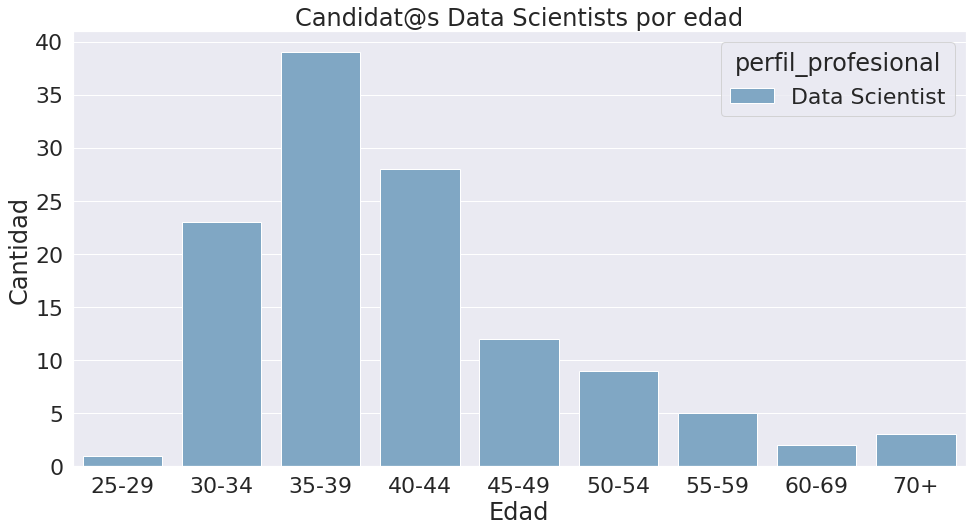

In [229]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='horizontal')
sns.countplot(x=df_total["edad"], data = df_total, hue ='perfil_profesional', palette='PuBu_r', order=order);
plt.title('Candidat@s Data Scientists por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

In [212]:
df_total.edad.unique()

array(['30-34', '35-39', '50-54', '40-44', '45-49', '55-59', '60-69',
       '70+', '25-29'], dtype=object)

Text(0, 0.5, 'Cantidad')

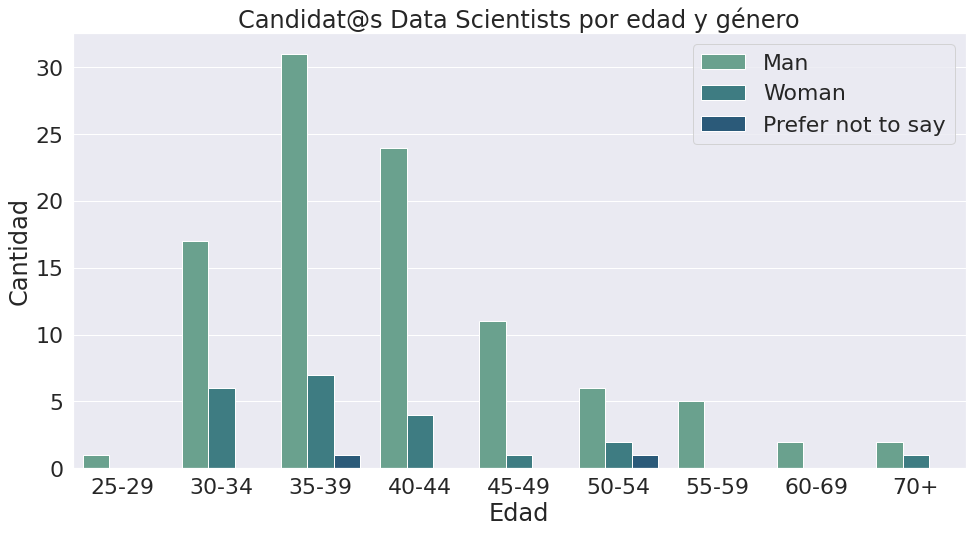

In [230]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='horizontal')
sns.countplot(x=df_total["edad"], data = df_total, hue ='genero', palette = "crest", order=order)
plt.legend(loc='upper right')
#palette = "viridis"
plt.title('Candidat@s Data Scientists por edad y género')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

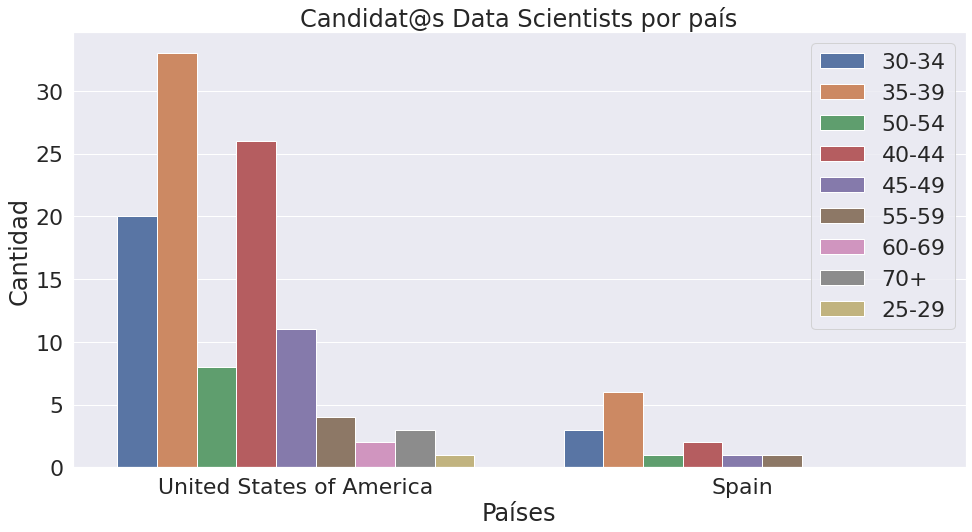

In [241]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='horizontal')
sns.countplot(x=df_total["pais"], data = df_total, hue ='edad')
plt.legend(loc='upper right');
plt.title('Candidat@s Data Scientists por país')
plt.xlabel('Países')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

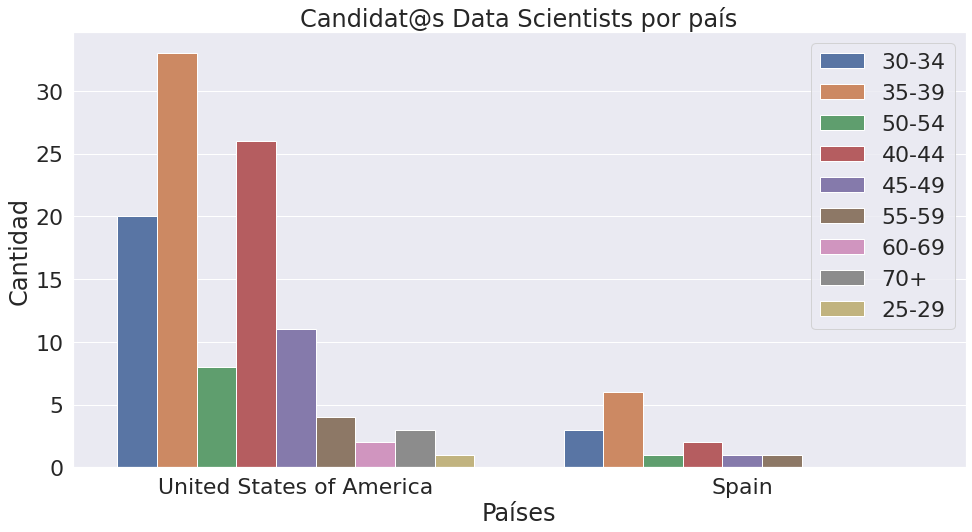

In [244]:
#order=df_total.sort_values('edad',ascending = False).pais)
plt.figure(figsize=(16,8))
plt.xticks(rotation='horizontal')
sns.countplot(x=df_total["pais"], data = df_total, hue ='edad')
plt.legend(loc='upper right');
plt.title('Candidat@s Data Scientists por país')
plt.xlabel('Países')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

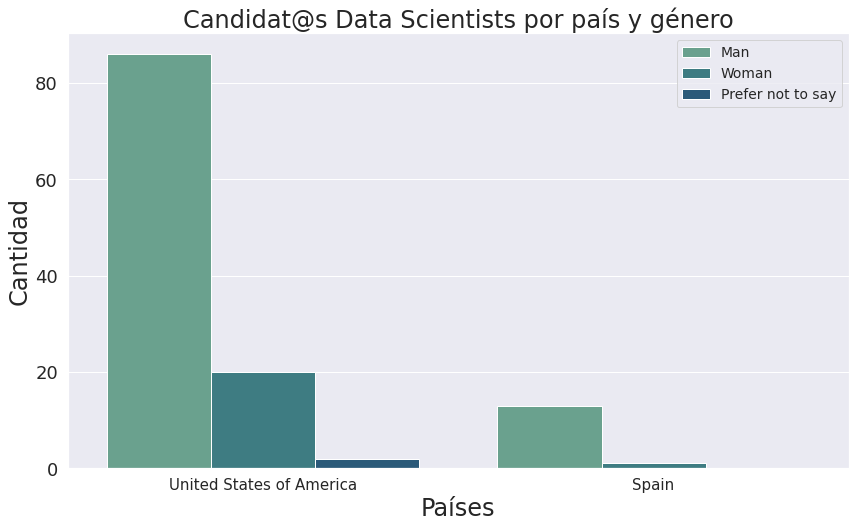

In [113]:
plt.figure(figsize=(14,8))
plt.xticks(rotation='horizontal')
sns.countplot(x=df_total["pais"], data = df_total, hue ='genero', palette = "crest");
# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=18)  
plt.title('Candidat@s Data Scientists por país y género')
plt.legend(loc='upper right', fontsize='xx-small')
plt.xlabel('Países')
plt.ylabel('Cantidad')

In [47]:
df_total['salario'].unique()

array(['250,000-299,999', '150,000-199,999', '100,000-124,999',
       '70,000-79,999', '200,000-249,999', '40,000-49,999',
       '50,000-59,999', '300,000-499,999', '60,000-69,999', '1,000-1,999',
       '80,000-89,999', '125,000-149,999', nan, '10,000-14,999',
       '>$1,000,000', '90,000-99,999', '$0-999', '$500,000-999,999'],
      dtype=object)

Text(0, 0.5, 'Cantidad')

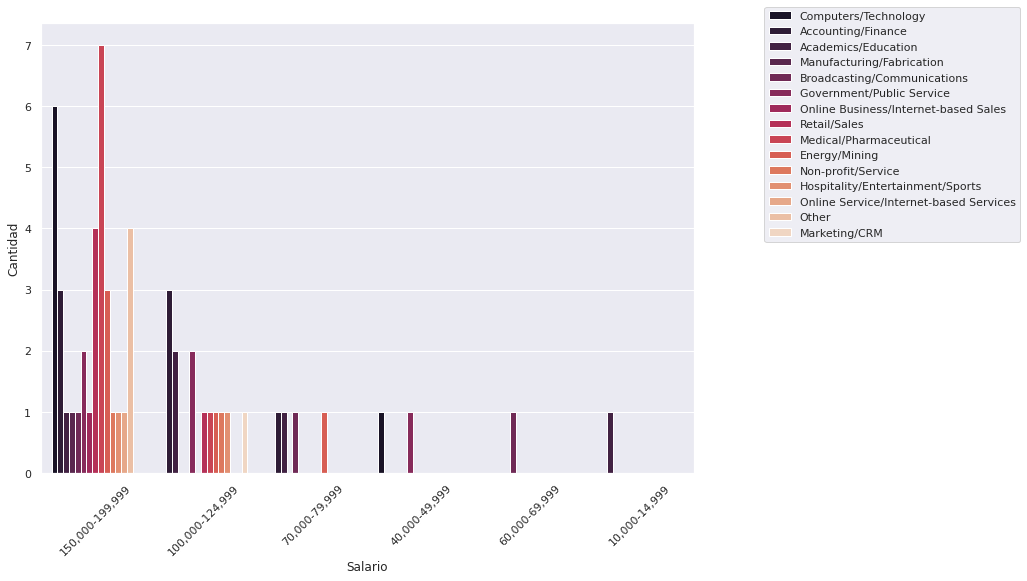

In [211]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="salario", data=df_salario,hue="industria_actual", palette="rocket")
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.1, 1.05))
sns.set(font_scale = 2);
plt.xlabel('Salario')
plt.ylabel('Cantidad')

In [ ]:
df_total = df[(df["salario"].isin(["10,000-14,999","30,000-39,999", "100,000-124,999", "50,000-59,999 ","40,000-49,999",
"20,000-24,999","15,000-19,999", "60,000-69,999","25,000-29,999", "70,000-79,999","150,000-199,999","80,000-89,999 "]))]

<Figure size 842.4x595.44 with 0 Axes>

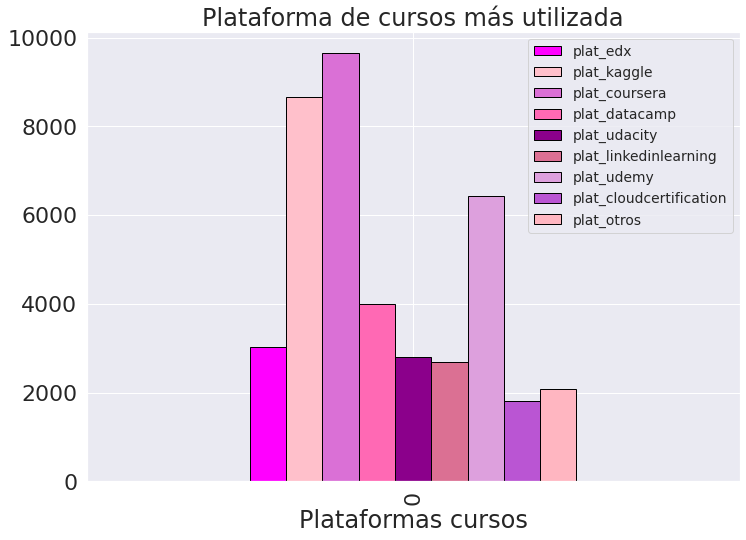

In [49]:
plt.figure()
df_plataformas.plot.bar(color=('magenta', 'pink', 'orchid', 'hotpink', 'darkmagenta', 'palevioletred', 
                                'plum', 'mediumorchid', 'lightpink'), edgecolor='black')
plt.title('Plataforma de cursos más utilizada')
plt.legend(loc='best', fontsize='xx-small')
plt.xlabel('Plataformas cursos');

<Figure size 842.4x595.44 with 0 Axes>

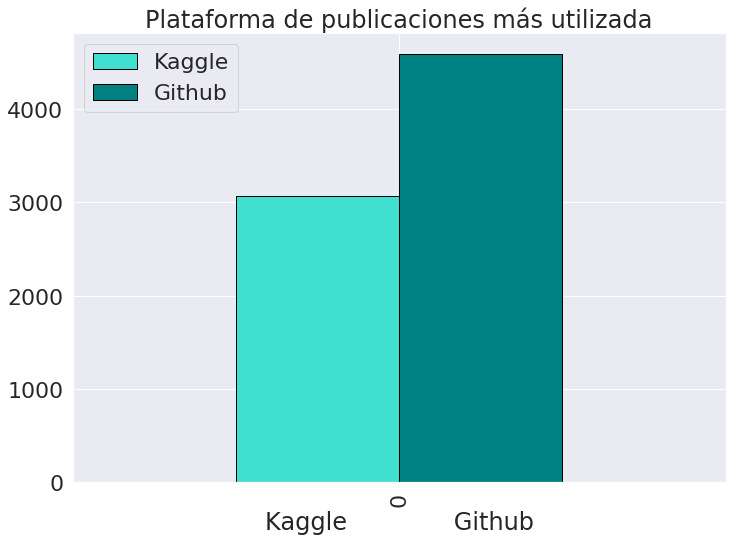

In [52]:
plt.figure()
df_publicaciones.plot.bar(color=('turquoise', 'teal'), edgecolor='black')
plt.xlabel('Kaggle              Github')
plt.title('Plataforma de publicaciones más utilizada');

# Conclusiones (opcional)

In [151]:
df_total["salario"]

184      250,000-299,999
287      150,000-199,999
393      100,000-124,999
482        70,000-79,999
647      200,000-249,999
              ...       
23525      80,000-89,999
23782    150,000-199,999
23990    250,000-299,999
25169    150,000-199,999
25835    125,000-149,999
Name: salario, Length: 122, dtype: object

In [152]:
# for i in df_total["salario"]:
#     try:
#         df_total[['salario_num1','salario_num2']] = i.str.split(pat = ("-"), n = -1, expand=True)
#     except:
#        np.nan 

In [169]:
df_total[['salario_num1','salario_num2']] = df_total["salario"].str.split(pat = ("-"), n = -1, expand=True)

/home/lcp87/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [170]:
df_total.salario_num2

184      299,999
287      199,999
393      124,999
482       79,999
647      249,999
          ...   
23525     89,999
23782    199,999
23990    299,999
25169    199,999
25835    149,999
Name: salario_num2, Length: 122, dtype: object

In [193]:
cols_limpiar = ["salario_num1","salario_num2"]
for i in cols_limpiar:
    df_total[i].replace(",", "", inplace=True, regex=True)
    df_total[i].replace("$", "", inplace=True, regex=True)
    df_total[i].replace(">\$", "", inplace=True, regex=True)
    df_total[i].replace("\$", "", inplace=True, regex=True)
    

/home/lcp87/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [199]:
df_total["salario_num1"].unique()

array([ 250000.,  150000.,  100000.,   70000.,  200000.,   40000.,
         50000.,  300000.,   60000.,    1000.,   80000.,  125000.,
            nan,   10000., 1000000.,   90000.,       0.,  500000.])

In [198]:
df_total["salario_num2"].unique()

array([2.99999e+05, 1.99999e+05, 1.24999e+05, 7.99990e+04, 2.49999e+05,
       4.99990e+04, 5.99990e+04, 4.99999e+05, 6.99990e+04, 1.99900e+03,
       8.99990e+04, 1.49999e+05,         nan, 1.49990e+04, 9.99990e+04,
       9.99000e+02, 9.99999e+05])

In [197]:
df_total["salario_num1"]=df_total["salario_num1"].astype("float")
df_total["salario_num2"]=df_total["salario_num2"].astype("float")

/tmp/ipykernel_602/4068473721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["salario_num1"]=df_total["salario_num1"].astype("float")
/tmp/ipykernel_602/4068473721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["salario_num2"]=df_total["salario_num2"].astype("float")


In [200]:
df_total["salario_medio"] = (df_total["salario_num1"] + df_total["salario_num2"])/2

/tmp/ipykernel_602/338396704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["salario_medio"] = (df_total["salario_num1"] + df_total["salario_num2"])/2


In [205]:
df_total.salario_medio.round(0)

184      275000.0
287      175000.0
393      112500.0
482       75000.0
647      225000.0
           ...   
23525     85000.0
23782    175000.0
23990    275000.0
25169    175000.0
25835    137500.0
Name: salario_medio, Length: 122, dtype: float64